# William Jardee
## Homework 4: Finite Square Well

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [2]:
A = 50e-12             #m
V_0 = 450 * 1.60218e-19 #J
M = 9.11e-31            #kg
H = 1.055e-34           #J*s

One of my other focuses is computer science, and as a cs nerd I really enjoy condensing code. One of the challenges often presented are how to write a code in as few lines as possible. <strike>I didn't want to get too deep into it,</strike> I went far too deep into it, so I just meesed around with lambdas and ternary operators (both to little effect). I was was able to get it down to 1 line (oh yeah!) through the use of recursive calls. The largest negative is the odd inputs that have to be used to keep track of the for loop and orginal x value (for breaking out in less calls), I could have written a two line code with a lambda code to get back to a conventional function (but who wants a normal two liner when you can have a one liner!). The straight forward code is commented out below. I would never actually use this code, I was just really proud that I even got a one liner to work here. I also tried to comment up the code the best I could to help it flow.

In [3]:
#The code that was provided, with all the unnecessary bits removed and condensed
def newton(f, der, x, x_keep, i):
    return x if f(x)/der(x) % (5e-6 * x_keep) == 0 or i == 20 else newton(f, der, x-f(x)/der(x), x_keep, i+1)
    

In [10]:
#def newton(func_name, deriv_name, x_zero):
    #delta_x = lambda x : func_name(x)/deriv_name(x)
    #for i in range(20):                #don't do it too much, or if we do break out
        #x_zero -= delta_x(x_zero)
        #if delta_x(x_zero) % (5e-6 * x_zero) == 0: return x_zero        #returns x if it only changed by 5e-6 times x
    
    #return x_zero


The next couple blocks are just codifying the equations provided in the homework:<Br>
$tan(z) = \sqrt{\Big(\frac{z_0}{z}\Big)^2 -1}$, s.t. $z = \frac{A}{\hbar}\sqrt{2m_e(E+V_0)}$

In [4]:
def left_side(e):  return m.sqrt((z0/z(e))**2 -1)
def right_side(e): return m.tan(z(e))

def z(e):          return A*m.sqrt(2*M*(e+V_0))/H

z0 = z(0)

$f(x) = tan(z) - \sqrt{\Big(\frac{z_0}{z}\Big)^2-1}$ <Br>
$f'(x) = z'sec^2(z) + 2z'\frac{z_0^2}{z^3}\frac{1}{2}\Big(\Big(\frac{z_0}{z}\Big)^2 -1\Big)^{-\frac{1}{2}}$<Br>
$f'(x) = z'sec^2(z) + z'z_0^2\frac{1}{z^3}\Big(\Big(\frac{z_0}{z}\Big)^2 -1\Big)^{-\frac{1}{2}}$<Br>
$z' = \frac{am}{\hbar}\Big(2m(E+V_0)\Big)^{-\frac{1}{2}}$

In [5]:
def func(x):       return right_side(x)-left_side(x)

def der_left(x):   return z0**2 / (z(x)**3 * m.sqrt((z0/z(x))**2 -1))
def der_right(x):  return (1/m.cos(z(x)))**2

def der_z(x):      return (M*A)/(H*m.sqrt(2*M*(x+V_0)))
    
def der_func(x):   return der_z(x) * (der_right(x) + der_left(x))

In [6]:
left_side_vects= np.vectorize(left_side)
right_side_vects= np.vectorize(right_side)
der_func_vects = np.vectorize(der_func)

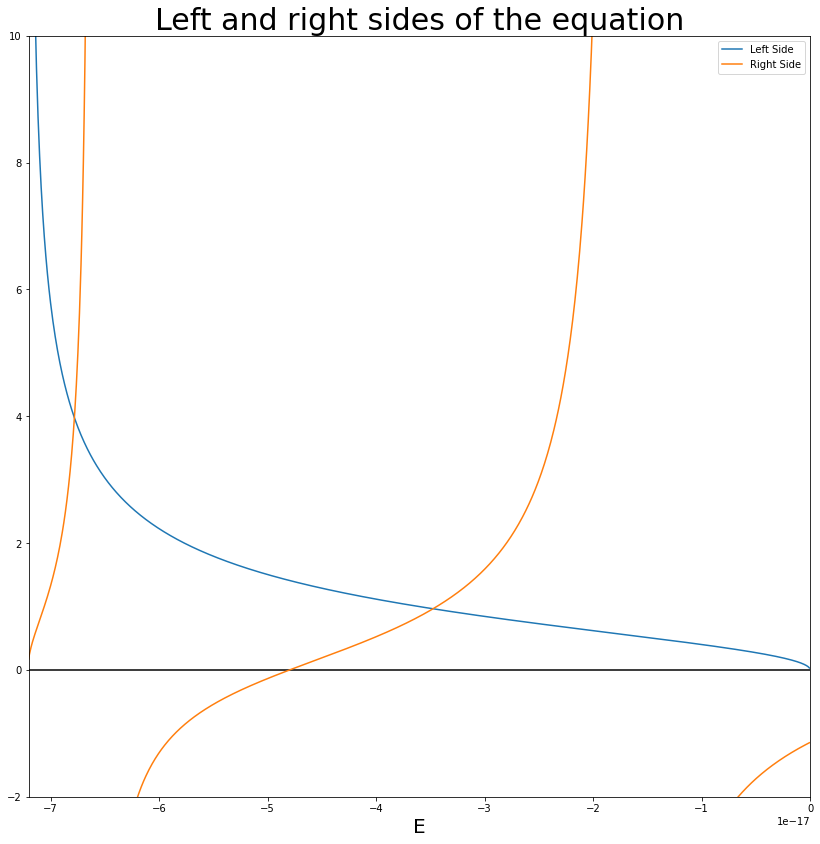

In [7]:
E = np.linspace(-V_0+0.001*V_0,-0.001*V_0,1000)

##Removing those annoying tan line jumps
y = right_side_vects(E)
y[:-1][np.diff(y) < 0] = np.nan

#Plotting the right and left sides, we can see where the intersection is
plt.figure(figsize = (14,14))

plt.plot(E, left_side_vects(E), label = "Left Side")
plt.plot(E, y, label = "Right Side")

plt.title('Left and right sides of the equation', fontsize=30)
plt.xlabel('E', size = 20)

plt.hlines(0, -7.5*10**(-17), 0)
plt.ylim(-2, 10)
plt.xlim(-7.2*10**(-17),0)
plt.legend()
plt.show()

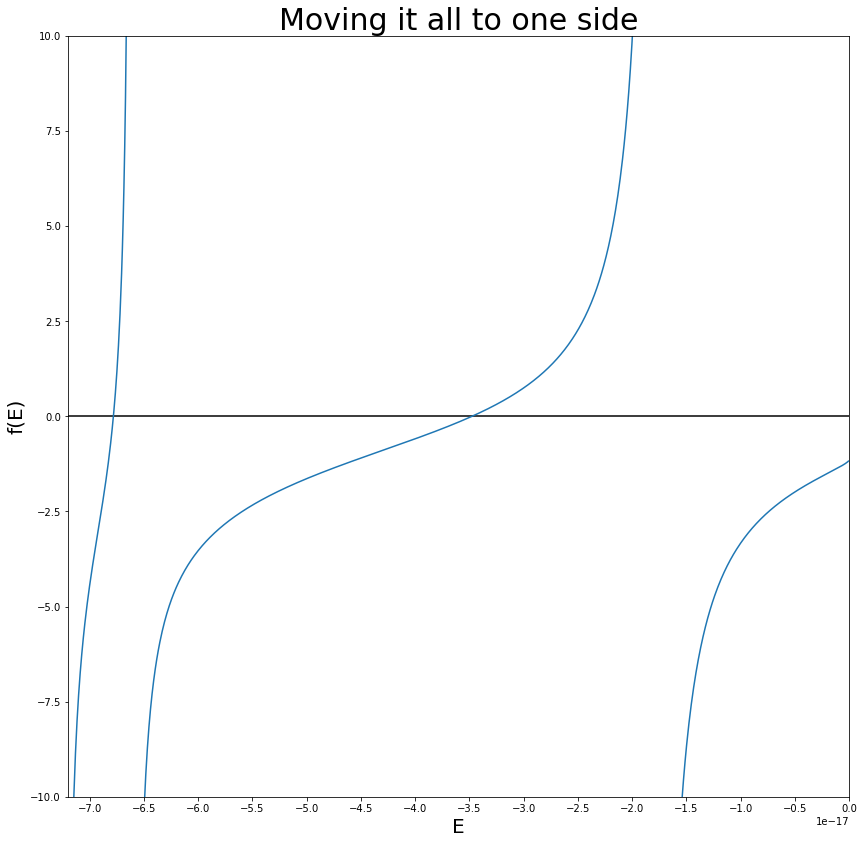

In [8]:
#Plotting the difference, this is notable because the above equations have intersections when this function has zeros
plt.figure(figsize = (14,14))
plt.plot(E, y-left_side_vects(E), label = "f(E)")

plt.title('Moving it all to one side', fontsize=30)
plt.ylabel('f(E)',size = 20)
plt.xlabel('E', size = 20)

plt.hlines(0, -7.5*10**(-17), 0)
plt.ylim(-10, 10)
plt.xlim(-7.2*10**(-17),0)
plt.xticks(np.linspace(-7*10**(-17),0,15)) 
plt.show()

In [9]:
#Provided guesses:
guesses = (-3.6*10**(-17),-6.79*10**(-17))

#Wrote this up with a dictionary because I didn't know how many guesses I was gonna have when I wrote this part
zeros = {}

#Equate zeros
for x in guesses: zeros[x] = newton(func, der_func, x, x, 0)
    
#Print those buggers out
for i in zeros.keys(): print("Guess: {:.3e} -> {:.5e}".format(i, zeros[i]))

Guess: -3.600e-17 -> -3.47587e-17
Guess: -6.790e-17 -> -6.78116e-17
